# Data Analyst - Final Project
---

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## EDA

### 1. Menampilkan contoh gambar dari masing-masing class

Found 5626 images belonging to 3 classes.


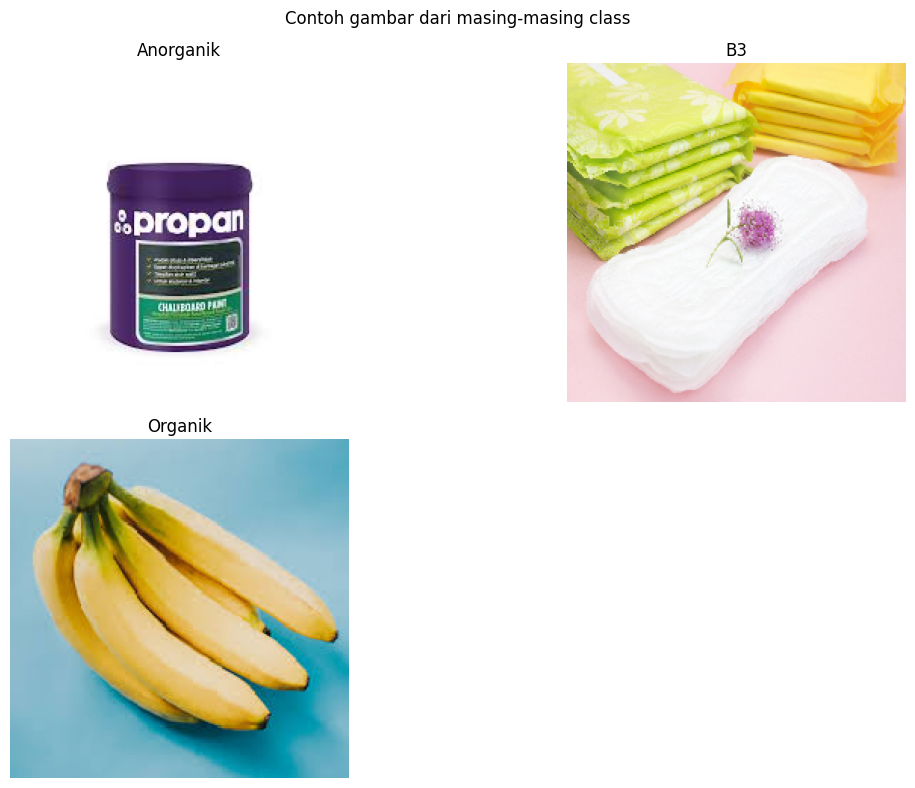

In [7]:
# Ambil satu gambar dari masing-masing class
eda_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
eda_flow = eda_gen.flow_from_directory(
    'Klasifikasi_Sampah',
    target_size=(224, 224),
    batch_size=1,
    class_mode='sparse',
    shuffle=False,
    seed=42
)

class_names = list(eda_flow.class_indices.keys())

plt.figure(figsize=(12, 8))
for i, cls in enumerate(class_names):
    while True:
        img, label = next(eda_flow)
        if int(label[0]) == i:  
            break
    
    plt.subplot(2, 2, i + 1)
    img_display = (img[0] * 255).astype('uint8')
    plt.imshow(img_display)
    plt.title(cls)
    plt.axis('off')

plt.suptitle('Contoh gambar dari masing-masing class')
plt.tight_layout()
plt.show()

### 2. Hitung jumlah gambar per class

#### a. Jumlah keseluruhan data

Jumlah gambar per kelas:
- Anorganik: 1953
- B3: 2636
- Organik: 1037


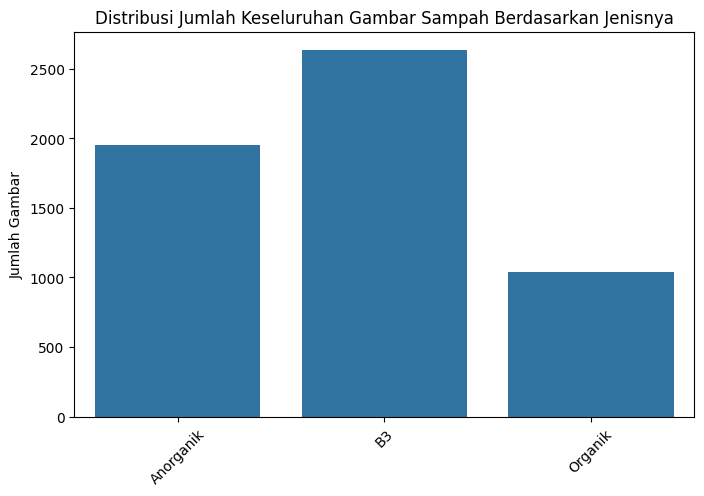

In [17]:
# Ambil nama kelas
class_names = list(eda_flow.class_indices.keys())

# Hitung jumlah gambar per kelas
class_counts = {}
for cls in class_names:
    cls_path = os.path.join('Klasifikasi_Sampah', cls)
    count = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    class_counts[cls] = count

print("Jumlah gambar per kelas:")
for cls, count in class_counts.items():
    print(f"- {cls}: {count}")

# Visualisasi 
plt.figure(figsize=(8, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title('Distribusi Jumlah Keseluruhan Gambar Sampah Berdasarkan Jenisnya')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=45)
plt.show()

#### b. Jumlah Data Train nya

Jumlah gambar per kelas:
- Anorganik: 1115
- B3: 1431
- Organik: 604


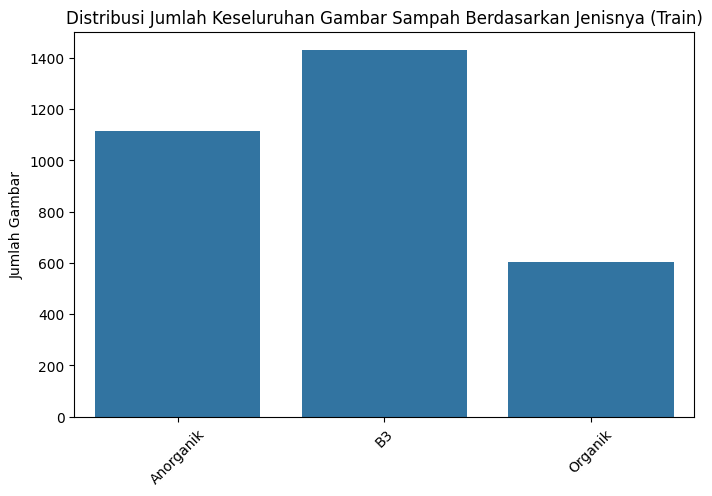

In [18]:
# Ambil nama kelas
class_names = list(eda_flow.class_indices.keys())

# Hitung jumlah gambar per kelas
class_counts = {}
for cls in class_names:
    cls_path = os.path.join('processed/train', cls)
    count = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    class_counts[cls] = count

print("Jumlah gambar per kelas:")
for cls, count in class_counts.items():
    print(f"- {cls}: {count}")

# Visualisasi 
plt.figure(figsize=(8, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title('Distribusi Jumlah Keseluruhan Gambar Sampah Berdasarkan Jenisnya (Train)')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=45)
plt.show()

#### c. Jumlah Data Test nya

Jumlah gambar per kelas:
- Anorganik: 391
- B3: 528
- Organik: 207


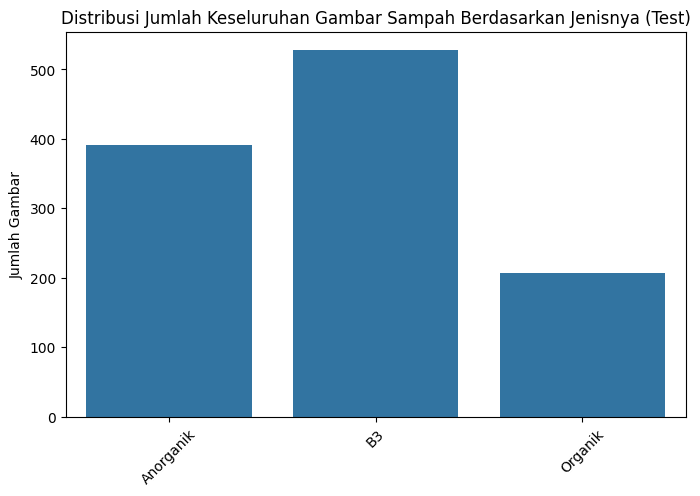

In [20]:
# Ambil nama kelas
class_names = list(eda_flow.class_indices.keys())

# Hitung jumlah gambar per kelas
class_counts = {}
for cls in class_names:
    cls_path = os.path.join('processed/test', cls)
    count = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    class_counts[cls] = count

print("Jumlah gambar per kelas:")
for cls, count in class_counts.items():
    print(f"- {cls}: {count}")

# Visualisasi 
plt.figure(figsize=(8, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title('Distribusi Jumlah Keseluruhan Gambar Sampah Berdasarkan Jenisnya (Test)')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=45)
plt.show()

#### d. Jumlah Data Validation nya

Jumlah gambar per kelas:
- Anorganik: 447
- B3: 677
- Organik: 226


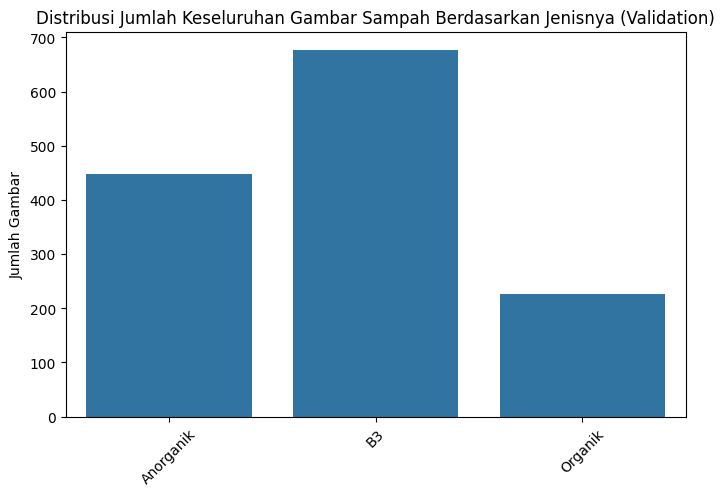

In [19]:
# Ambil nama kelas
class_names = list(eda_flow.class_indices.keys())

# Hitung jumlah gambar per kelas
class_counts = {}
for cls in class_names:
    cls_path = os.path.join('processed/val', cls)
    count = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    class_counts[cls] = count

print("Jumlah gambar per kelas:")
for cls, count in class_counts.items():
    print(f"- {cls}: {count}")

# Visualisasi 
plt.figure(figsize=(8, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title('Distribusi Jumlah Keseluruhan Gambar Sampah Berdasarkan Jenisnya (Validation)')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=45)
plt.show()

### 3. Ciri-ciri masing-masing class

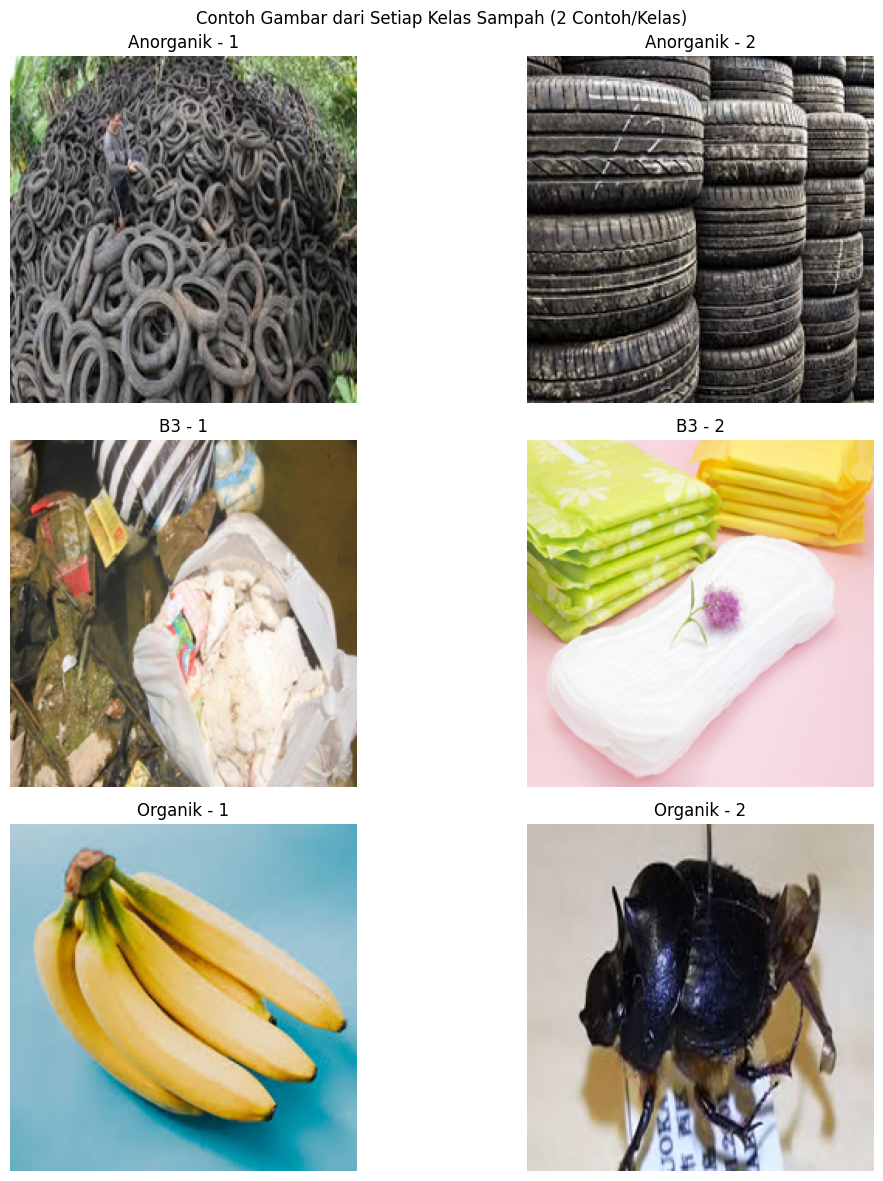

In [23]:
# Path ke folder dataset
base_dir = 'Klasifikasi_Sampah'

# Ambil nama kelas (nama folder)
class_names = sorted(os.listdir(base_dir))  # ['anorganik', 'b3', 'organik']

# Hitung total subplot: 3 kelas × 2 gambar = 6 subplot
n_cols = 2
n_rows = len(class_names)

plt.figure(figsize=(12, n_rows * 4))

for i, cls in enumerate(class_names):
    class_path = os.path.join(base_dir, cls)
    
    # Ambil semua file gambar di folder kelas ini
    image_files = [f for f in os.listdir(class_path) 
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    if len(image_files) >= 2:
        # Ambil 2 gambar pertama
        first_image = image_files[0]
        second_image = image_files[1]
        
        # Gambar 1
        img_path_1 = os.path.join(class_path, first_image)
        img1 = Image.open(img_path_1).resize((224, 224))
        plt.subplot(n_rows, n_cols, i*2 + 1)
        plt.imshow(img1)
        plt.title(f"{cls} - 1")
        plt.axis('off')
        
        # Gambar 2
        img_path_2 = os.path.join(class_path, second_image)
        img2 = Image.open(img_path_2).resize((224, 224))
        plt.subplot(n_rows, n_cols, i*2 + 2)
        plt.imshow(img2)
        plt.title(f"{cls} - 2")
        plt.axis('off')

plt.suptitle('Contoh Gambar dari Setiap Kelas Sampah (2 Contoh/Kelas)')
plt.tight_layout()
plt.show()

 1. Anorganik
Sampah yang tidak mudah terurai secara alami, biasanya berasal dari bahan sintetis atau non-biologis.

- Ciri-ciri berdasarkan contoh gambar:
    - Anorganik (Gambar 1) (ban bekas)
        - Bentuknya bulat dan tebal, tersusun berantakan. Warnanya hitam pekat dengan permukaan agak kasar. Teksturnya elastis tapi keras, dan jelas tidak bisa menyerap air.

    - Anorganik (Gambar 2) (ban bekas yang sudah disusun rapih (bisa jadi sudah dipilah))
        - Masih berbentuk bulat dengan pola ban yang terlihat jelas. Warnanya hitam. Biasanya tidak berbau dan tidak mudah rusak. Jenis ini bisa didaur ulang menjadi berbagai produk berbahan karet.

2. B3 (Bahan Berbahaya dan Beracun)
Sampah yang mengandung zat kimia beracun, korosif, atau berpotensi membahayakan manusia dan lingkungan.

- Ciri-ciri berdasarkan contoh gambar:
    - B3 (Gambar 1) (sampah medis + plastik berwarna)
        - Biasanya berupa campuran plastik dan kertas dengan warna yang beragam seperti merah, kuning, atau putih transparan. Bentuknya tidak beraturan seperti sampah rumah tangga, tapi bisa mengandung benda berbahaya seperti masker medis, jarum, atau obat kedaluwarsa.

    - B3 (Gambar 2) (pembalut wanita & popok bayi)
        - Bentuknya pipih dan terlipat, warnanya kebanyakan putih atau pastel. Mengandung bahan seperti serat sintetis dan superabsorbent polymer, sehingga tidak bisa diproses seperti sampah biasa. Kadang ditemui label hygiene atau simbol biohazard.

3. Organik
Sampah yang berasal dari bahan alami dan mudah terurai secara biologis.

- Ciri-ciri berdasarkan contoh gambar:
    - Organik (Gambar 1) (pisang)
        - Bentuknya panjang dan sedikit melengkung dengan kulit yang tipis. Warnanya kuning cerah, kadang ada bintik cokelat. Teksturnya lembut dan mudah dipisahkan dengan tangan. Aromanya manis (kalau busuk baunya berubah jadi fermentasi dan agak asam).

    - Organik (Gambar 2) (kumbang badak / kumbang tanduk)
        - Bentuknya kecil dan agak bulat, dengan cangkang hitam mengilap. Meski bukan sampah rumah tangga, ini contoh bahan organik yang berasal dari makhluk hidup dan bisa terurai secara alami.

### 4. Analisa ukuran gambarnya yang ada di folder processed (data yang akan diolah)

In [18]:
base_path = 'processed'  # Path ke folder utama
classes = ['Anorganik', 'B3', 'Organik']  # Nama folder kelas

subsets = ['train', 'val', 'test']

for subset in subsets:
    print(f"\nSubset: {subset}\n")
    
    for label in classes:
        class_path = os.path.join(base_path, subset, label)
        
        # Cek apakah folder kelas ada
        if not os.path.exists(class_path):
            print(f"Folder '{label}' tidak ditemukan di '{base_path}/{subset}'.")
            continue
        
        # Ambil semua file gambar
        img_files = [f for f in os.listdir(class_path) 
                     if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))]
        
        if img_files:
            first_img_file = img_files[0]
            img_path = os.path.join(class_path, first_img_file)
            
            try:
                img = Image.open(img_path)
                print(f"{label}: {img.size} | {img.format} | {img.mode}")
            except Exception as e:
                print(f"{label}: Error - {e}")
        else:
            print(f"{label}: Tidak ada gambar.")


Subset: train

Anorganik: (224, 224) | JPEG | RGB
B3: (224, 224) | JPEG | RGB
Organik: (224, 224) | JPEG | RGB

Subset: val

Anorganik: (224, 224) | JPEG | RGB
B3: (224, 224) | JPEG | RGB
Organik: (224, 224) | JPEG | RGB

Subset: test

Anorganik: (224, 224) | JPEG | RGB
B3: (224, 224) | JPEG | RGB
Organik: (224, 224) | JPEG | RGB
